# Dataset 과 DataLoader

- 딥러닝 모델을 학습시키고 평가할때 사용할 데이터를 제공하기 위한 객체
- **torch.utils.data.Dataset** 
    - input/output dataset을 저장한다.
        - data augmentation 등을 처리할 수 있다.
    - subscriptable, iterable 타입. 
    > subscriptable타입: indexing을 이용해 원소 조회가 가능한 타입)
    --> 사용자 정의 dataset이나 pytorch제공 dataset도 있다. 또한 bu
- **torch.utils.data.DataLoader**
    - Dataset의 데이터를 제공하는 Iterable 객체.
    - Dataset이 가지고 있는 데이터를 어떻게 제공할 지 설정한다.
        - batch size 등을 설정한다.

# Built-in Dataset

- 파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공한다.
- 모든 built-in dataset은 [`torch.utils.data.Datase`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현되있다.
    - [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    - [text dataset](https://pytorch.org/text/stable/datasets.html)
    - [audio dataset](https://pytorch.org/audio/stable/datasets.html)

## Image  Built-in dataset Loading
torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공한다.

- 각 Dataset 클래스의 주요 매개변수
    - **root**: str
        - Raw data를 저장할 디렉토리 경로
    - **train**: bool
        - True일경우 Train set을 False일 경우 Test set을 load
    - **download**: bool
        - True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
        - default값이 False이고 download하지 않는것을 의미
    - **transform**: function
        - Loading한 이미지를 변환하는 function.
            - Normalization이나 data Agumentation 처리를 한다.

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets
import numpy as np

In [3]:
# data 저장할 directory 경로 변수
## MNIST용 사용자 정의 dataset
DATASET_PATH='datasets' # 상대경로, 절대경로 상관없다.
mnist_trainset=datasets.MNIST(root=DATASET_PATH, # 원본데이터가 위치한 디렉토리
                              train=True, # True :Trainset, False : Testset
                              download=True, # root 경로에 dataset이 없을 경우 dwonload 받을지 여부(default : False), transfrom = 데이터 변환함수
                             )
mnist_testset=datasets.MNIST(root=DATASET_PATH,
                             train=False,
                             download=True
                            )

In [4]:
# 타입확인
type(mnist_trainset),isinstance(mnist_trainset, torch.utils.data.Dataset) #상속관계

(torchvision.datasets.mnist.MNIST, True)

In [5]:
## built-in dataset 정보 확인
print(mnist_trainset)
print(mnist_testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: datasets
    Split: Test


In [6]:
# MNIST Dataset 정보확인
print('trainset 데이터 개수:',len(mnist_trainset))
print('testset 데이터 개수:',len(mnist_testset))
# dataset -> subscriptable -> indexing
# 1개의 데이터를 조회
data_1=mnist_trainset[10500] # 타입: tuple, (X,y)
print(type(data_1),len(data_1))

# input data type
print(type(data_1[0]),type(data_1[1]))

print(data_1[1])
data_1[0] # image

trainset 데이터 개수: 60000
testset 데이터 개수: 10000
<class 'tuple'> 2
<class 'PIL.Image.Image'> <class 'int'>
1


(28, 28)


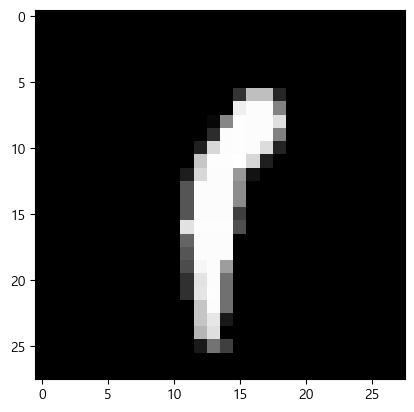

In [7]:
# PIL.Image ==> ndarray
import matplotlib.pyplot as plt
img_arr=np.array(data_1[0])
print(img_arr.shape)
plt.imshow(img_arr,cmap='gray')

In [8]:
## built-in dataset은 slicing은 안된다.
mnist_trainset[0]
# mnist_trainset[:5] ## error 발생


(<PIL.Image.Image image mode=L size=28x28>, 5)

In [9]:
# 분류 -> Y의 class확인
mnist_trainset.classes
# list : index-class, value-class name

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [10]:
mnist_trainset.classes[3]

'3 - three'

In [11]:
mnist_trainset.class_to_idx
# dictionary: key-class name, vlaue-class

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [12]:
mnist_trainset.class_to_idx['5 - five']

5

In [13]:
data_1[0]

In [14]:
np.array(data_1[0]).shape

(28, 28)

In [15]:
data_1[0].size # width, hegiht만 알려준다. channel에 대해서는 알려주지 않는다.
#### 제대로된 형태는 위와 같이 변환하고 봐야한다.####

(28, 28)

In [16]:
mnist_trainset.data # 전체 input data가 저장된 속성
mnist_trainset.data.shape

torch.Size([60000, 28, 28])

In [17]:
mnist_trainset.targets # 전체 output data가 저장된 속성
mnist_trainset.targets.shape

torch.Size([60000])

### TODO

- CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train, test dataset의 데이터 개수
    1. train set 과 test set의 input data의  shape
    1. train set 과 test set의 output data의  shape
    1. class index - class name
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.
    
    

In [18]:
DATASET_PATH='data' # 상대경로, 절대경로 상관없다.
CIFAR10_trainset=datasets.CIFAR10(root=DATASET_PATH, # 원본데이터가 위치한 디렉토리
                              train=True, # True :Trainset, False : Testset
                              download=True, # root 경로에 dataset이 없을 경우 dwonload 받을지 여부(default : False), transfrom = 데이터 변환함수
                             )
CIFAR10_testset=datasets.CIFAR10(root=DATASET_PATH,
                             train=False,
                             download=True
                            )

Files already downloaded and verified
Files already downloaded and verified


In [19]:
print("trainset 개수:",len(CIFAR10_trainset))
print("testset 개수:",len(CIFAR10_testset))

trainset 개수: 50000
testset 개수: 10000


In [20]:
data_2=CIFAR10_trainset[0]

In [21]:
print(CIFAR10_trainset.data.shape)
print(CIFAR10_testset.data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
print(type(data_2),len(data_2))

<class 'tuple'> 2


In [23]:
print(type(CIFAR10_trainset.targets),len(CIFAR10_trainset.targets))
print(type(CIFAR10_testset.targets),len(CIFAR10_testset.targets))

<class 'list'> 50000
<class 'list'> 10000


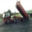

In [24]:
CIFAR10_trainset[0][0]
CIFAR10_trainset[1][0]
CIFAR10_trainset[2][0]

## 정답

In [25]:
#train, test dataset의 데이터 개수
print(CIFAR10_testset)
print(CIFAR10_trainset)
print(len(CIFAR10_trainset),len(CIFAR10_testset))

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
50000 10000


In [26]:
# train set 과 test set의 input data의  shape
print(CIFAR10_trainset.data.shape)
print(CIFAR10_testset.data.shape)

#print(type(CIFAR10_trainset.data))

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [27]:
# train set 과 test set의 output data의  shape
# print(CIFAR10_testset.targets)
print(type(CIFAR10_trainset.targets),len(CIFAR10_trainset.targets))
print(type(CIFAR10_testset.targets),len(CIFAR10_testset.targets))

print(type(CIFAR10_trainset.targets),np.shape(CIFAR10_trainset.targets))
print(type(CIFAR10_testset.targets),np.shape(CIFAR10_testset.targets))
## np.shpae을 쓰려면 안에 list의 길이가 일정해야한다. [[2,3],[1,2,3]] 이런식이면 안된다.

<class 'list'> 50000
<class 'list'> 10000
<class 'list'> (50000,)
<class 'list'> (10000,)


In [28]:
# class index - class name
CIFAR10_trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [29]:
CIFAR10_testset.classes[1]

'automobile'

In [30]:
CIFAR10_trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [31]:
CIFAR10_trainset.class_to_idx['bird']

2

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x281B2A56230> frog


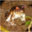

In [32]:
# train set의 이미지 5장을 출력. label의 이름을 title로 출력.
idx=0
data = CIFAR10_trainset[idx]
print(type(data[0]))
print(data[0],CIFAR10_trainset.classes[data[1]])
data[0]

In [33]:
for i in range(5):
    x,y=CIFAR10_trainset[i]
    print(x,y)
    print(y,CIFAR10_trainset.classes[y])

<PIL.Image.Image image mode=RGB size=32x32 at 0x281B2A551B0> 6
6 frog
<PIL.Image.Image image mode=RGB size=32x32 at 0x281B2A326B0> 9
9 truck
<PIL.Image.Image image mode=RGB size=32x32 at 0x281B2A33C70> 9
9 truck
<PIL.Image.Image image mode=RGB size=32x32 at 0x281B2A305B0> 4
4 deer
<PIL.Image.Image image mode=RGB size=32x32 at 0x281B2A326B0> 1
1 automobile


6 frog


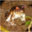

9 truck


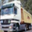

9 truck


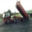

4 deer


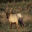

1 automobile


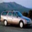

In [34]:
for i in range(5):
    x,y=CIFAR10_trainset[i] # tuple 대입
    print(y,CIFAR10_trainset.classes[y])
    display(x)

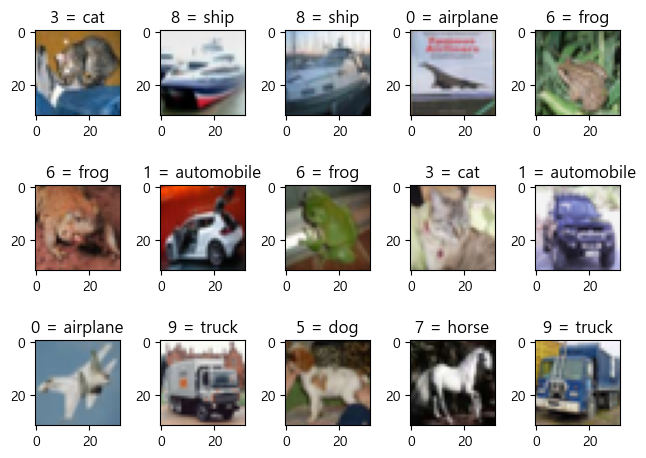

In [35]:
# matplotlib
m,n=3,5
for i in range(m*n):
    x,y=CIFAR10_testset[i]
    # x : PIL.Image -> ndarray
    img= np.array(x)
#     print(img.shape)
    plt.subplot(m,n,i+1)
    plt.title(f"{y} = {CIFAR10_testset.classes[y]}")
    plt.imshow(img)
plt.tight_layout()
plt.show()

### transform 매개변수를 이용한 정규화

- Feature scaling과 동일한 목적으로 image의 전체 pixel의 값들이 유사한 scale을 가지도록 처리한다.
- transform 매개변수에 전처리 함수를 넣으면 데이터에 대한 전처리를 할 수 있다.

In [36]:
d_1=mnist_trainset[0][0]
print(type(d_1))
img_1=np.array(d_1)
print(img_1.shape, img_1.max(),img_1.min(), img_1.dtype)

<class 'PIL.Image.Image'>
(28, 28) 255 0 uint8


class로 만들고 attribute에 min,max 저장하고 method를 만드는데 개별 data 처럼 만든다.
class로 만들어서 실제로는 객체를 넣는다.

#### ToTensor
 -  PIL Image나 NumPy ndarray 를 FloatTensor 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 \[0., 1.\] 범위로 비례하여 조정한다.
 -  color 이미지의 경우 channel 축을 0번째 축으로 설정 (height, width, channel) -> (channel, height, width)로 변경을 의미
 - https://pytorch.org/vision/stable/transforms.html

In [38]:
from torchvision import transforms # 영상 데이터 전처리를 위한 transforms들을 제공하는 모듈
mnist_trainset_2=datasets.MNIST(root=DATASET_PATH,train=True, download=True,transform=transforms.ToTensor())
# ToTensor : 클래스 - 객체 생성한 것을 넣어주는 것이다.

100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 28216899.75it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 29000644.92it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 7718241.16it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [39]:
x,y=mnist_trainset_2[0]

In [40]:
print(type(x),type(y))

<class 'torch.Tensor'> <class 'int'>


In [43]:
print(x.shape) # channel 축이 생성 앞에 1이 생김, shape이 (channel, height, width)로 변경
print(x.max(),x.min(), x.dtype) ## max: 255->1, min : 0 ->0. dtype : uint8->float32

torch.Size([1, 28, 28])
tensor(1.) tensor(0.) torch.float32


### transform.Normalize
- 채널별로 지정한 평균을 뺀 뒤 지정한 표준편차로 나워서 정규화를 진행한다.
- ToTensor()로 변환된 데이터를 받아서 추가 변환
        - 여려 변환을 할 경우 `torchvision.transforms.Compose` 클래스를 이용한다.

- z score -> standard scaling할때 계산할것( x- avg / std) 평균을 빼서 평균이 0인것처럼 만들고 표준편차로 나눈다.

In [44]:
# 평균 : 0.5, 표준편차 : 0.5 -> 0 ~ 1 값을 변환
(0-0.5)/0.5,(1-0.5)/0.5

(-1.0, 1.0)

In [45]:
# 0 ~ 1 변환
# 채널별(RGB)로 평균 : (0.485,0.456,0.406), 표준편차( 0.229,0.224,0.225)

In [48]:
# Compose() : 여러 transform들을 묶어서 등록한 순서대로 실행시켜준다.

transform = transforms.Compose([transforms.ToTensor(), # 0 ~ 1 로 정규화 (+torch.Tensor()변환, channel first
                                transforms.Normalize(mean=(0.5, ), std=(0.5, )) # 평균, 표준편차는 채널별로 설정
                               ])

mnist_trainset_3=datasets.MNIST(root=DATASET_PATH,train=True, download=True,transform=transform)
mnist_testset_3=datasets.MNIST(root=DATASET_PATH,train=False, download=True,transform=transform)

100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 18879934.41it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 3088305.47it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 7818656.99it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [49]:
a=torch.full((1,28,28),fill_value=100)
a

tensor([[[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
          100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
         [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
          100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
         [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
          100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
         [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
          100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
         [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
          100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
         [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
          100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
         [100, 100, 100, 100, 100,

In [50]:
a=np.full((28,28,1),fill_value=100,dtype='uint8')
print(a.shape)
b=transform(a)
b

(28, 28, 1)


tensor([[[-0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157],
         [-0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157],
         [-0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157],
         [-0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0

In [51]:
# pixcel : 100 -> 0 ~ 1(pixcel/255) -> (p - 평균)/표준편차
np.round(((100/255)-0.5)/0.5,4)

-0.2157

In [52]:
b.shape

torch.Size([1, 28, 28])

In [53]:
x,y=mnist_trainset_3[0]
x.min(),x.max()

(tensor(-1.), tensor(1.))

In [57]:
# Normalize의 평균, 표준편차 설정:
# 모든 채널에 동일한 값을 지정할 경우 -> 값 하나만 설정
# 채널별로 다른값 지정할 경우 -> 튜플에 채널별로 각각의 값을 설정
transform = transforms.Compose([transforms.ToTensor(), # 0 ~ 1 로 정규화 (+torch.Tensor()변환, channel first
                                transforms.Normalize(mean=(0.5, ), std=(0.5, )) # 평균, 표준편차는 채널별로 설정
                               ])

cifar10_trainset_2=datasets.CIFAR10(root=DATASET_PATH,train=True, download=True,
                                    transform=transform)
#                                     transform=transforms.ToTensor())

Files already downloaded and verified


In [58]:
x,y=cifar10_trainset_2[0]
x.shape, x.min(), x.max(), x.dtype

(torch.Size([3, 32, 32]), tensor(-1.), tensor(1.), torch.float32)

In [59]:
x[0].min(),x[0].max()
x[1].min(),x[1].max()
x[2].min(),x[2].max()

(tensor(-1.), tensor(0.8431))

## DataLoader 생성

- DataLoader
    - 모델이 학습하거나 추론할 때 Dataset의 데이터를 모델에 제공해준다. (feeding)
    - initalizer속성
        - dataset: 값을 제공하는 Dataset 타입 객체
        - batch_size: 한번에 값을 제공할 batch 크기
        - shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        - drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 모델에 제공하지 않는다.


In [60]:
from torch.utils.data import DataLoader
mnist_train_loader=DataLoader(dataset=mnist_trainset_3,
                              batch_size=512,
                              shuffle=True,
                             )

In [61]:
# 에폭당 step 수 : 1에폭당 몇번 파라미터들을 update하는지
## 전체 data개수 / batch 크기 -> 올림
print(np.ceil(60000/512),600000/512)
print(len(mnist_train_loader))

118.0 1171.875
118


In [63]:
# DataLoader에서 Dataset 조회
print(type(mnist_train_loader.dataset))
mnist_train_loader.dataset

<class 'torchvision.datasets.mnist.MNIST'>


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [64]:
# DataLoader -> Iterable
batch_one = next(iter(mnist_train_loader))

In [66]:
type(batch_one) # list [ X,y ]

list

In [69]:
X=batch_one[0]
y=batch_one[1]

In [68]:
X.shape  # batch_size, channel, height, width

torch.Size([512, 1, 28, 28])

In [70]:
y.shape

torch.Size([512])

## Custom Dataset 구현

1. `torch.utils.data.DataSet` 클래스를 상속한 클래스를 정의한다.
2. `__init__(self, ...)` 
    - DataSet객체 생성시 필요한 설정들을 초기화 한다. 
    - ex) Data저장 경로, transform 설정 여부 등
3. `__len__(self)`
    - 총 데이터 수를 반환하도록 구현한다.
    - DataLoader가 Batch 생성할 때 사용한다.
4. `__getitem__(self, index)`
    - index의 Data point를 반환한다.
    - input(X), output(y) 를 튜플로 반환한다.
    - transform이 있을 경우 변환처리한 input을 반환한다.

In [94]:
# subscriptable type 의 클래스
class Test:
    def __len__(self):
        return 13
    def __getitem__(self,idx):
        
        if idx=='가':
            return 'A'
        elif 0<=idx <=2 :
            return chr(ord('A')+idx)
        else :
            raise IndexError(self.__len__())

In [95]:
t=Test()
print(len(t))
# print(t[3])
print(t[0],t['가'])

13
A A


In [96]:
for i in t:
    print(i)

A
B
C


# OxfordPet Dataset 생성
- https://www.robots.ox.ac.uk/~vgg/data/pets/
- 개,고양이 37가지 품종
- 품종별로 200장 정도씩 구성됨. (품종별로 이미지 개수는 다르다)

- 목표
    - train: 70%, validation: 20%, test: 10%

In [97]:
# 품종별 데이터 200wkd
print("train:",200*0.7,"valid:",200*0.2,"test:나머지")

train: 140.0 valid: 40.0 test:나머지


In [98]:
import os
import re
from glob import glob
import tarfile
from PIL import Image

In [133]:
tar_file_path='images.tar.gz'
data_root_path='datasets/oxfordpet' # 압축 풀 directory 경로
os.makedirs(data_root_path,exist_ok=True)

In [134]:
# 압축풀기
with tarfile.open(tar_file_path,'r:gz') as tar:
    tar.extractall(data_root_path) # data_root_path 경로에 압축을 푼다. (생략하면 현재디렉토리에 품)

In [ ]:
# tar = tarfile.open()
# tar.extractall()
# tar.close()

In [103]:
## 이미지들이 저장되어 있는 경로
data_path=os.path.join(data_root_path,'images')

# 각 이미지의 경로를 list로 저장
data_path

'datasets/oxfordpet\\images'

In [107]:
os.listdir('datasets/oxfordpet')

['images']

In [108]:
os.listdir('datasets/oxfordpet/images')

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_100.mat',
 'Abyssinian_101.jpg',
 'Abyssinian_101.mat',
 'Abyssinian_102.jpg',
 'Abyssinian_102.mat',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.

In [109]:
glob('datasets/oxfordpet')

['datasets/oxfordpet']

In [114]:
glob('datasets/oxfordpet/images/Abyssinian_1.jpg')

['datasets/oxfordpet/images/Abyssinian_1.jpg']

In [118]:
glob('datasets/oxfordpet/**/*.jpg')
# ** : 모든 하위 디렉토리 (디렉토리 경로에 넣어준다.)
# * : 모든 글자
### 모든 이미지파일들의 개별 경로
file_list=glob('datasets/oxfordpet/**/*.jpg')
len(file_list)

7390

In [122]:
f=file_list[0]
print(f)
print("파일경로에서 확장자 분리:",os.path.splitext(f))
print("파일경로에서 파일명 분리:",os.path.basename(f))
print("파일경로에서 디렉토리 경로 분리:",os.path.dirname(f))

datasets/oxfordpet\images\Abyssinian_1.jpg
파일경로에서 확장자 분리: ('datasets/oxfordpet\\images\\Abyssinian_1', '.jpg')
파일경로에서 파일명 분리: Abyssinian_1.jpg
파일경로에서 디렉토리 경로 분리: datasets/oxfordpet\images


In [135]:
# 이미지들에서 RGB 컬러 이미지를 제외한 나머지 색모드 파일들을 제거
remove_cnt=0 # 몇장 삭제했는지 count
for idx,image_path in enumerate(file_list):
    # 이미지 읽기 -> PIL.Image 사용
    with Image.open(image_path) as image:
        image_mode=image.mode # str: L - grayscale, RGB - RGB
    if image_mode!= 'RGB':
        # 삭제
        os.remove(image_path)
        remove_cnt+=1
        print(f'{idx}번째 이미지 삭제 {os.path.basename(image_path)},mode:{image_mode}')

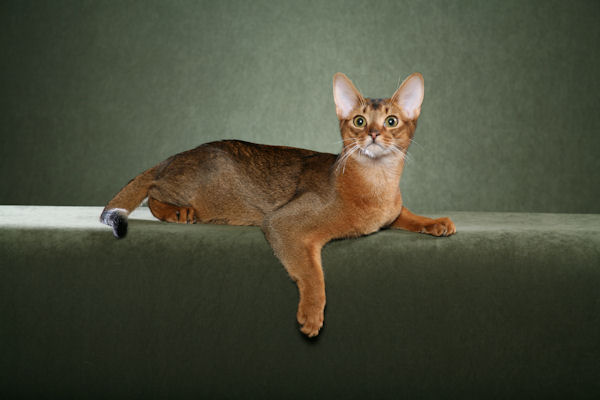

In [125]:
img=Image.open(r'datasets/oxfordpet/images/Abyssinian_1.jpg')
img.mode

In [132]:
file_list=glob('datasets/oxfordpet/**/*.jpg')
len(file_list)

7378

### index_to_class, class_to_index 생성
- index_to_class : class들을 가지는 리스트. index(0, 1, ..)로 class 조회
- class_to_index : key: 클래스이름, value: index -> class이름 넣으면 index 반환
- 파일명이 class

In [145]:
class_name_set=set()
# file_list 에서 파일명을 추출한 뒤에 class_name_set에 추가
for path in file_list:
    filename=os.path.basename(path) #'datasets\\oxfordpet\\images\\Abyssinian_1.jpg'  ==> Abyssinian_1.jpg
    filename2=os.path.splitext(filename)[0] # Abyssinian_1.jpg ==>  ( Abyssinian_1,  .jpg)
    class_name=re.sub(r"_\d+","",filename2) #( Abyssinian_1,  .jpg) ->  Abyssinian_1
    class_name_set.add(class_name)

In [146]:
index_to_class=list(class_name_set)
index_to_class.sort()

In [147]:
index_to_class

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [150]:
# class name => class(숫자) ===> dictionary
class_to_index={name:idx for idx, name in enumerate(index_to_class)}
class_to_index

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [152]:
index_to_class[3],class_to_index['Bombay']

('Bombay', 3)

In [153]:
# 분리
train_index=int(200*0.7) # trainset 개수
valid_index=train_index + int(200*0.2)
print(train_index,valid_index)
print(f"train_set:[0:{train_index}]")
print(f"valid_set:[{train_index}:{valid_index}]")
print(f"test_set:[{valid_index}:]")

140 180
train_set:[0:140]
valid_set:[140:180]
test_set:[180:]


In [161]:
# train_set, valid_set, test_set 분리
### 각 dataset에 들어갈 파일들의 경로를 저장할 리스트
train_path_list, valid_path_list, test_path_list=[],[],[]

cnt=0 # class별 현재 몇번째 데이터인지
previous_class= '' # 현재 class의 이름

for path in file_list:
    # 경로에서 파일명만 추출
    file_name=os.path.splitext(os.path.basename(path))[0]
    class_name=re.sub(r'_\d+','',file_name)
    
    if previous_class==class_name: #작업중인 class
        cnt+=1
    else : # 새로운 class 생성 및 작업 시작의미
        cnt=1
    
    if cnt <= train_index: # 현재 작업하는 cnt가 train index보다 작다면 train set에 들어갈 이미지
        train_path_list.append(path)
    elif train_index < cnt and valid_index >= cnt: # validation set 에 들어갈 이미지
        valid_path_list.append(path)
    else:
        test_path_list.append(path)
    
    previous_class=class_name # 처리한 파일의 class이름을 previous_class로 설정

In [162]:
len(train_path_list), len(valid_path_list),len(test_path_list)

(5180, 1480, 718)

In [139]:
yorkshire_terrier_161.jpg

NameError: name 'yorkshire_terrier_161' is not defined

In [154]:
file_list

['datasets/oxfordpet\\images\\Abyssinian_1.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_10.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_100.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_101.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_102.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_103.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_104.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_105.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_106.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_107.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_108.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_109.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_11.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_110.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_111.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_112.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_113.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_114.jpg',
 'datasets/oxfordpet\\images\\Abyssinian_115.jpg',
 'datasets/oxfordpet\\images\\Abyss

In [155]:
os.path.splitext(os.path.basename('datasets/oxfordpet\\images\\Abyssinian_1.jpg'))[0]

'Abyssinian_1'

# Dataset을 이용해 CSV파일에 저장된 데이터셋 로딩

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Train / Test 분리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y=iris['target'].aply(lambda x: class_to_index[x]).values ## 이거 하는 이유?

X_train, X_test, y_train, y_test= train_test_split(X,y,stratify=y)

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

NameError: name 'X' is not defined

In [ ]:
#ndarray=> tensor
# TensorDataset(X,y) X,y 모두 torch.Tensor type이어야 한다. 
train_set_ir2=TensorDataset(torch.Tensor(X_train_scaled,dtype=torch.float32),
                            torch.tensor(y_train,dtype=torch.float32))

In [ ]:
len(train_set_ir2)

In [ ]:
train_set_ir2[6]

In [ ]:
# 사용자 정의 Dataset 정의
class IrisDataset(Dataset):
    
    def __init__(self, X,y mean, std):
        # mean, std => standard scaling 을 하기 위해 train set의 평균, 표준편차를 받는다.
        # 모델의 parameter type인 float32에 맞춘다.
        self.X=torch.tensor(X,dtype=torch.float32)
        
        # feature scaling
        mean=torch.tensor(mean,dtype=torch.float32)
        std=torch.tensor(std,dtype=torch.float32)
        
        self.X=(self.X-mean)/std
        self.y = y
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self,index):
        X=self.X[index]
        y=self.y[index]
        return X,y

In [3]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)

train_set_ir=IrisDataset(X_train,y_train,mean,std)

NameError: name 'X_train' is not defined

In [ ]:
len(train_set_ir)
train_set_ir[0]

In [ ]:
# 사용자 정의 Dataset 정의 대신해서
## TensorDataset
## X,y가 tensor객체로 메모리에 loading 되어 있는 경우

In [4]:
!pip install gdown --upgrade ## google download 의미

## torchvision.datasets.ImageFolder 이용
- 저장장치에 파일로 저장된 image들을 쉽게 로딩할 수 있도록 한다.
- train/validation/test 데이터셋을 저장하는 디렉토리에 class 별로 디렉토리를 만들고 이미지를 저장한다.

In [5]:
# !pip install gdown --upgrade
import os
from zipfile import ZipFile
import gdown
def down_extract():
    os.makedirs('data', exist_ok=True)
    url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
    # id 이하는 변경되는 것이므로 상황에 맞게 편집
    fname = 'data/cats_and_dogs_small.zip'

    gdown.download(url, fname, quiet=False) # True하면 download 상태 표시 해준다.
    
    #zipfile모듈: Zip 압축파일을 다루는 모듈(압축하기, 풀기)
    from zipfile import ZipFile
    # 압축풀기: ZipFile(압축파일경로).extractall(풀경로) # 디렉토리 없으면 생성해 준다.
    with ZipFile(fname) as zipFile:
        zipFile.extractall(os.path.join('data','cats_and_dogs_small'))
        
down_extract()        

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV
From (redirected): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV&confirm=t&uuid=d3fc91e5-d2e9-42ec-9f4e-90ffd6b7f409
To: C:\class\machine_learning\07_dl\data\cats_and_dogs_small.zip
100%|█████████████████████████████████████████████████████████████████████████████| 90.8M/90.8M [00:03<00:00, 27.4MB/s]


In [10]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

train_set_cd=ImageFolder(root='data/cats_and_dogs_small/train', transform=ToTensor())
test_set_cd=ImageFolder(root='data/cats_and_dogs_small/test', transform=ToTensor())
valid_set_cd=ImageFolder(root='data/cats_and_dogs_small/validation/', transform=ToTensor())


In [11]:
train_set_cd

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: data/cats_and_dogs_small/train
    StandardTransform
Transform: ToTensor()

In [12]:
len(train_set_cd),len(valid_set_cd),len(test_set_cd)

(2000, 1000, 1000)

In [13]:
train_set_cd.classes

['cats', 'dogs']

In [14]:
train_set_cd.class_to_idx

{'cats': 0, 'dogs': 1}

In [15]:
x,y=train_set_cd[0]
type(x), type(y)

(torch.Tensor, int)

In [16]:
x.shape

torch.Size([3, 374, 500])

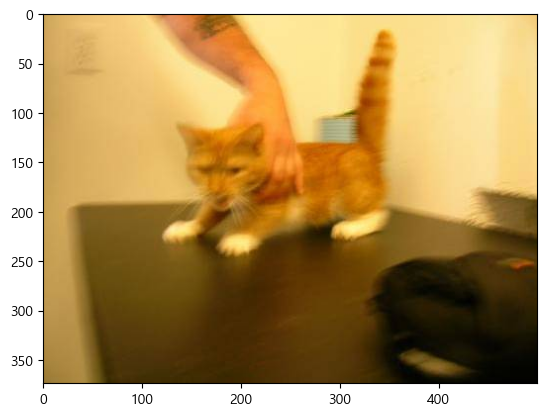

In [19]:
plt.imshow(x.permute(1,2,0))